## Calculate the RSI (relative strength index) on the FXUSDCAD

In [17]:
import pandas as pd
import math

from matplotlib import pyplot as plt

In [5]:
usd_cad_path = "../data/dataset/FXUSDCAD.csv"
usd_cad = pd.read_csv(usd_cad_path)
usd_cad.head(10)

,date,FXUSDCAD
0,2017-01-03,1.3435
1,2017-01-04,1.3315
2,2017-01-05,1.3244
3,2017-01-06,1.3214
4,2017-01-09,1.3240
5,2017-01-10,1.3213
6,2017-01-11,1.3250
7,2017-01-12,1.3106
8,2017-01-13,1.3141
9,2017-01-16,1.3152


In [20]:
for i in range(14, len(usd_cad)):
    previous_loss = []
    previous_gain = []
    current_gain = 0
    current_loss = 0

    for j in range(i-13, i):
        current_difference = usd_cad.loc[j, "FXUSDCAD"] - usd_cad.loc[j-1, "FXUSDCAD"]
        if  current_difference > 0:
            previous_gain.append(current_difference)
            
        else:
            previous_loss.append(abs(current_difference))
    previous_average_gain = sum(previous_gain)/len(previous_gain)
    previous_average_loss = sum(previous_loss)/len(previous_loss)
    rsi = 100 - (100 / (1 + (((previous_average_gain*14)))/((previous_average_loss*14))))
    usd_cad.loc[i, "RSI"] = rsi

usd_cad.head(20)

,date,FXUSDCAD,RSI
0,2017-01-03,1.3435,NaN
1,2017-01-04,1.3315,NaN
2,2017-01-05,1.3244,NaN
3,2017-01-06,1.3214,NaN
4,2017-01-09,1.3240,NaN
5,2017-01-10,1.3213,NaN
6,2017-01-11,1.3250,NaN
7,2017-01-12,1.3106,NaN
8,2017-01-13,1.3141,NaN
9,2017-01-16,1.3152,NaN


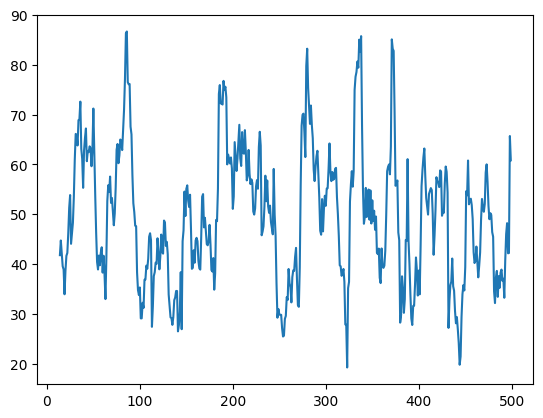

In [26]:
plt.plot(usd_cad["RSI"][:500])

In [28]:
usd_cad.to_csv("../data/dataset/FXUSDCAD_rsi.csv", index = False)